# this is a file for calculating the Lagrangian rate of change of the log-scale $Chl_a$ using  $\frac{D \ ( log_{e} Chl_a)}{Dt}:=\frac{1}{Chl_a}\frac{D \ ( Chl_a)}{Dt}$
* A few remarks:
  * Unit $mg/(m^3 \cdot day)$
  * Natural logarithm added
  * All the rates on the same time frequency
  * validate the rate of change of the log-scale rate Chl-a by FD
  * Monthly trends 
    * aaa
    * aaa

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr
from datetime import datetime
import datetime

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
# see readme file for the file convetion in the experiments,
# for instance "3" indicates distance is addd to the dataset 


plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



# freqency
freq = 4
suf = 'D'
in_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_3.csv'
out_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_4.csv'
folder = './data_collector_modisa_chla9km/'
direc = folder + in_filename
direc

print('in_filename and path:', direc)
print('out_filename:', out_filename)

df_chl_out_3 = pd.read_csv(direc, index_col='index')
df_chl_out_3

in_filename and path: ./data_collector_modisa_chla9km/df_chl_out_4D_modisa_3.csv
out_filename: df_chl_out_4D_modisa_4.csv


,id,time,ve,vn,lat,spd,var_tmp,temp,var_lon,var_lat,lon,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
7793,34710,2002-11-01,1.633063,12.896375,16.864937,13.935000,0.001790,28.994688,0.000128,0.000066,63.124500,0.385674,-0.413780,0.060035,-1.221596,595.3000
8030,10206,2002-11-05,-7.127375,6.176937,10.969438,11.645312,1000.000000,NaN,0.001244,0.000420,67.246562,0.142620,-0.845818,0.014256,-1.846018,528.3030
8034,15707,2002-11-05,-19.271875,-17.786375,13.879687,26.887063,1000.000000,NaN,0.000134,0.000069,67.560500,0.154235,-0.811817,-0.025134,NaN,558.6690
8052,34710,2002-11-05,-0.118437,10.472312,17.212188,10.930375,0.001605,28.945750,0.000118,0.000062,63.165562,0.407654,-0.389708,0.021980,-1.657972,573.8850
8058,34721,2002-11-05,6.933938,-2.230437,12.594938,14.224375,0.001764,29.537625,0.000098,0.000054,67.715438,0.154256,-0.811758,0.015577,-1.807530,499.8170
8289,10206,2002-11-09,0.022625,2.215375,11.142188,3.775187,1000.000000,NaN,0.001970,0.000627,67.122750,0.130267,-0.885166,-0.012353,NaN,540.8280
8291,11089,2002-11-09,-16.238438,-3.502250,14.321875,17.239313,0.004114,28.998500,0.000147,0.000073,64.466188,0.196834,-0.705899,0.026991,-1.568773,874.0360
8293,15707,2002-11-09,-4.991500,-23.108937,13.178562,24.741937,1000.000000,NaN,0.000178,0.000086,67.198438,0.167595,-0.775739,0.013360,-1.874194,571.2510
8317,34721,2002-11-09,11.853125,7.093188,12.646125,16.993125,0.001886,29.446188,0.000155,0.000075,68.066313,0.138921,-0.857231,-0.015335,NaN,463.7140


In [3]:
# All the rates on the same time frequency
check1 = df_chl_out_3.chl_rate/ df_chl_out_3.chlor_a 
check1 = check1/ freq
check2 = df_chl_out_3.chl_rate.divide(freq *df_chl_out_3.chlor_a, axis = 'index')
# an check 
np.sum(abs(check1 - check2))

0.0

In [4]:
# add the column to the dataframe and output the dataset
df_chl_out_3['chlor_a_logE_rate'] = pd.Series(np.array(check2), index=df_chl_out_3.index)
df_chl_out_3.head()

,id,time,ve,vn,lat,spd,var_tmp,temp,var_lon,var_lat,lon,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
7793,34710,2002-11-01,1.633063,12.896375,16.864937,13.935000,0.001790,28.994688,0.000128,0.000066,63.124500,0.385674,-0.413780,0.060035,-1.221596,595.300,0.038916
8030,10206,2002-11-05,-7.127375,6.176937,10.969438,11.645312,1000.000000,NaN,0.001244,0.000420,67.246562,0.142620,-0.845818,0.014256,-1.846018,528.303,0.024989
8034,15707,2002-11-05,-19.271875,-17.786375,13.879687,26.887063,1000.000000,NaN,0.000134,0.000069,67.560500,0.154235,-0.811817,-0.025134,NaN,558.669,-0.040740
8052,34710,2002-11-05,-0.118437,10.472312,17.212188,10.930375,0.001605,28.945750,0.000118,0.000062,63.165562,0.407654,-0.389708,0.021980,-1.657972,573.885,0.013480
8058,34721,2002-11-05,6.933938,-2.230437,12.594938,14.224375,0.001764,29.537625,0.000098,0.000054,67.715438,0.154256,-0.811758,0.015577,-1.807530,499.817,0.025245


In [5]:
df_chl_out_3.chlor_a_logE_rate.describe()  # more scattered on the left hand side

count    774.000000
mean      -0.104321
std        0.637559
min       -8.727518
25%       -0.068108
50%       -0.000827
75%        0.044028
max        0.245494
Name: chlor_a_logE_rate, dtype: float64

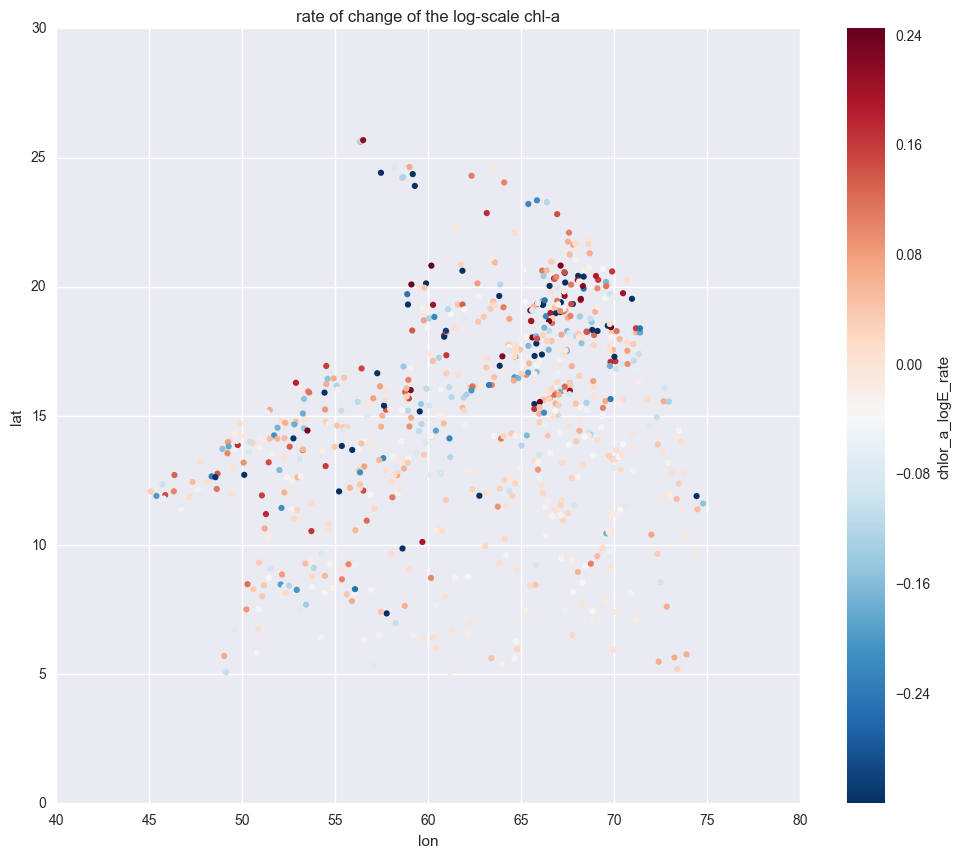

In [6]:
# visualize the ROC of log(chl_a) around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_3.plot(kind='scatter', x='lon', y='lat', c='chlor_a_logE_rate', cmap='RdBu_r', vmin=check2.median()-0.5*check2.std(), vmax=check2.max(), edgecolor='none', ax=ax, title = 'rate of change of the log-scale chl-a')

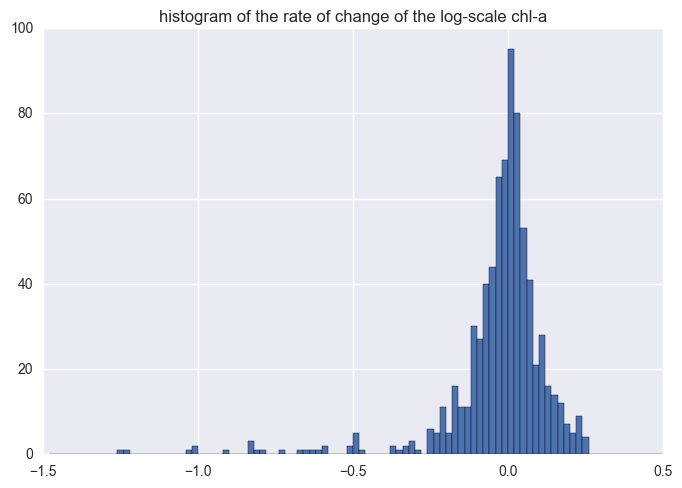

In [7]:
# histogram for non standarized data
axdf_chl = df_chl_out_3.chlor_a_logE_rate.dropna().hist(bins=100,range=[-1.5,0.5]) # there are very a few small values on the left
axdf_chl.set_title('histogram of the rate of change of the log-scale chl-a')

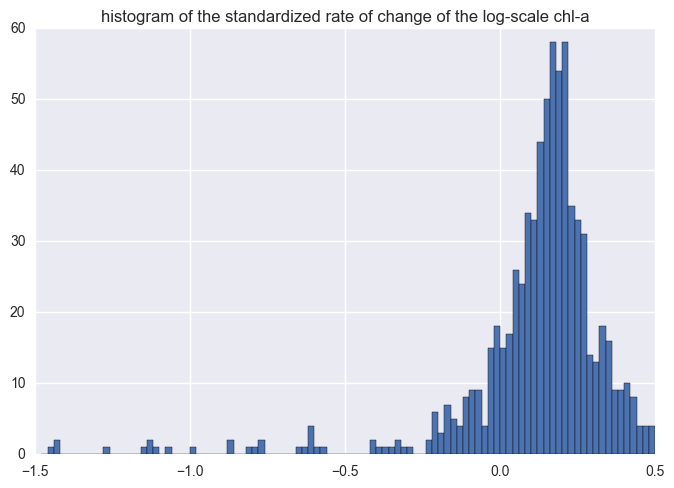

In [8]:
# standarized series
tmp = df_chl_out_3.chlor_a_logE_rate.dropna()
tmp = (tmp - tmp.mean())/tmp.std()
axdf_chl_stdan = tmp.hist(bins=100,range=[-1.5,0.5])   # there are very a few small values on the left
axdf_chl_stdan.set_title('histogram of the standardized rate of change of the log-scale chl-a')

In [21]:
(np.log(0.130267)-np.log(0.142620))   / freq

-0.022649390062320029

In [10]:
###########################
# On 2D-subsampling Dataset
###########################
# Val 1:
# id:11089, time:2002-11-09"
# (0.130267 - 0.142620) / (freq*(0.130267) )   == -0.023707078538693614
#########
# Val 2:
# id:11089, time:2002-11-07"
# (np.log(0.130267)-np.log(0.142620))   / freq == -0.022649390062320029 # very close to the value above

df_chl_out_3.sort_values(by=['id', 'time']).head()

,id,time,ve,vn,lat,spd,var_tmp,temp,var_lon,var_lat,lon,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
8030,10206,2002-11-05,-7.127375,6.176937,10.969438,11.645312,1000.0,NaN,0.001244,0.000420,67.246562,0.142620,-0.845818,0.014256,-1.846018,528.303,0.024989
8289,10206,2002-11-09,0.022625,2.215375,11.142188,3.775187,1000.0,NaN,0.001970,0.000627,67.122750,0.130267,-0.885166,-0.012353,NaN,540.828,-0.023708
9584,10206,2002-11-29,-9.458500,2.887438,11.352438,10.056125,1000.0,NaN,0.001644,0.000518,66.800250,0.141035,-0.850673,0.007791,-2.108406,575.839,0.013810
11397,10206,2002-12-27,-10.298000,0.181000,12.586125,11.005313,1000.0,NaN,0.001646,0.000541,64.445063,0.155624,-0.807923,-0.002679,NaN,845.700,-0.004304
11656,10206,2002-12-31,-12.688625,-3.712000,12.512063,13.497563,1000.0,NaN,0.000777,0.000294,64.097000,0.175074,-0.756778,0.019450,-1.711073,882.902,0.027774


In [11]:
# convert into datetime
df_chl_out_3['time'] = pd.to_datetime(df_chl_out_3['time']) # ,format='%m/%d/%y %I:%M%p'
df_chl_out_3.sort_values(by=['id', 'time']).head()  # a check

,id,time,ve,vn,lat,spd,var_tmp,temp,var_lon,var_lat,lon,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
8030,10206,2002-11-05,-7.127375,6.176937,10.969438,11.645312,1000.0,NaN,0.001244,0.000420,67.246562,0.142620,-0.845818,0.014256,-1.846018,528.303,0.024989
8289,10206,2002-11-09,0.022625,2.215375,11.142188,3.775187,1000.0,NaN,0.001970,0.000627,67.122750,0.130267,-0.885166,-0.012353,NaN,540.828,-0.023708
9584,10206,2002-11-29,-9.458500,2.887438,11.352438,10.056125,1000.0,NaN,0.001644,0.000518,66.800250,0.141035,-0.850673,0.007791,-2.108406,575.839,0.013810
11397,10206,2002-12-27,-10.298000,0.181000,12.586125,11.005313,1000.0,NaN,0.001646,0.000541,64.445063,0.155624,-0.807923,-0.002679,NaN,845.700,-0.004304
11656,10206,2002-12-31,-12.688625,-3.712000,12.512063,13.497563,1000.0,NaN,0.000777,0.000294,64.097000,0.175074,-0.756778,0.019450,-1.711073,882.902,0.027774


In [12]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist}
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist, chlor_a_log10_rate}

# 3 represents 3 features: {temp, chl_rate, dist}
# 4 represents 4 features: {temp, chl_rate, dist, chlor_a_log10_rate }
print('out_filename:', out_filename)
df_chl_out_3.to_csv(out_filename, sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv(out_filename, index_col='index')

# a check
test.sort_values(by=['id', 'time']).head()

out_filename: df_chl_out_4D_modisa_4.csv


,id,time,ve,vn,lat,spd,var_tmp,temp,var_lon,var_lat,lon,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
8030,10206,2002-11-05,-7.127375,6.176937,10.969438,11.645312,1000.0,NaN,0.001244,0.000420,67.246562,0.142620,-0.845818,0.014256,-1.846018,528.303,0.024989
8289,10206,2002-11-09,0.022625,2.215375,11.142188,3.775187,1000.0,NaN,0.001970,0.000627,67.122750,0.130267,-0.885166,-0.012353,NaN,540.828,-0.023708
9584,10206,2002-11-29,-9.458500,2.887438,11.352438,10.056125,1000.0,NaN,0.001644,0.000518,66.800250,0.141035,-0.850673,0.007791,-2.108406,575.839,0.013810
11397,10206,2002-12-27,-10.298000,0.181000,12.586125,11.005313,1000.0,NaN,0.001646,0.000541,64.445063,0.155624,-0.807923,-0.002679,NaN,845.700,-0.004304
11656,10206,2002-12-31,-12.688625,-3.712000,12.512063,13.497563,1000.0,NaN,0.000777,0.000294,64.097000,0.175074,-0.756778,0.019450,-1.711073,882.902,0.027774


In [13]:
## check the week numbers of the range from Nov-01-01 to Mar-01-01
for year in range(2002, 2017):
    print(str(year)+'-11-01 is week', datetime.datetime(year, 11, 1).isocalendar()[1])  # 44, 45, 

print('----')
for year in range(2002, 2017):
    print(str(year)+'-3-31 is week', datetime.datetime(year, 3, 31).isocalendar()[1])  # 13, 14

plt.show()

2002-11-01 is week 44
2003-11-01 is week 44
2004-11-01 is week 45
2005-11-01 is week 44
2006-11-01 is week 44
2007-11-01 is week 44
2008-11-01 is week 44
2009-11-01 is week 44
2010-11-01 is week 44
2011-11-01 is week 44
2012-11-01 is week 44
2013-11-01 is week 44
2014-11-01 is week 44
2015-11-01 is week 44
2016-11-01 is week 44
----
2002-3-31 is week 13
2003-3-31 is week 14
2004-3-31 is week 14
2005-3-31 is week 13
2006-3-31 is week 13
2007-3-31 is week 13
2008-3-31 is week 14
2009-3-31 is week 14
2010-3-31 is week 13
2011-3-31 is week 13
2012-3-31 is week 13
2013-3-31 is week 13
2014-3-31 is week 14
2015-3-31 is week 14
2016-3-31 is week 13


the min and max of the week index is 1, 53 :


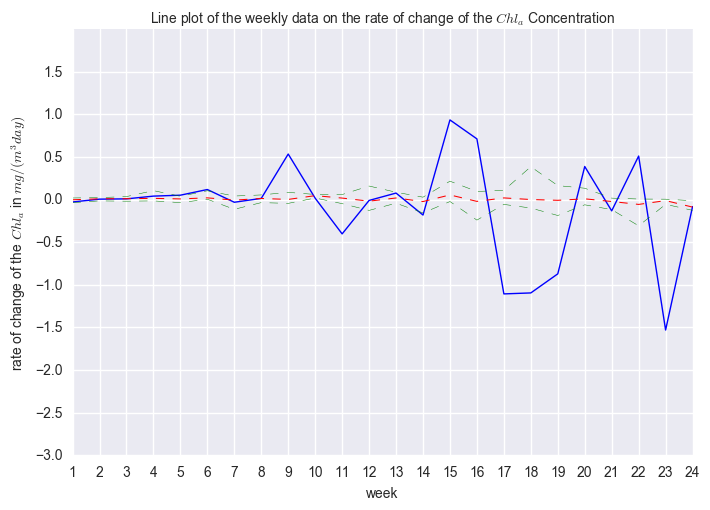

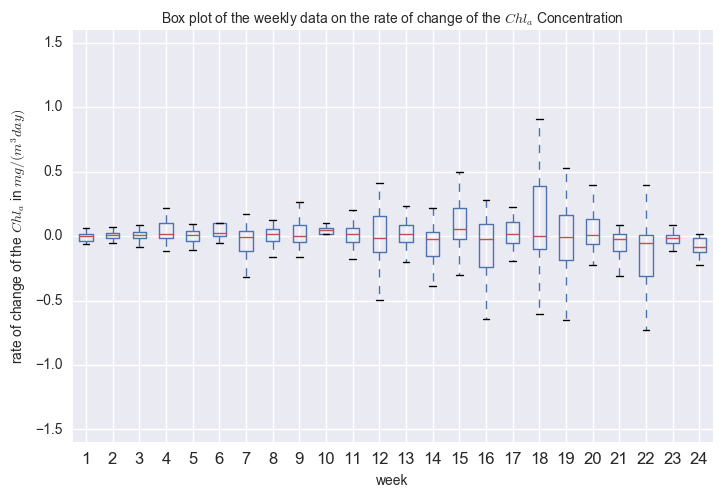

In [14]:
##### weekly plot on the Lagrangian rate of change of the chl-a
#sns.set(style="white")
#sns.set(color_codes=True)

### 
# Approach 1 depreciated
#grouped = df_timed.chl_rate.groupby(df_timed.index.week)
#grouped.plot.box()

### 
# Approach 2
# prepare data  a. use index or columns to group

###
# select the corresponding weeks, prepare the data
df_timed = df_chl_out_3.set_index('time')
df_timed['week'] = df_timed.index.week

mask_NovMar = (df_timed.week<=14) | (df_timed.week >=44)
df_timed_NovMar = df_timed[mask_NovMar]
#df_timed_NovMar.head()

# now rotate the index to make Nov-01-01 the first month
print('the min and max of the week index is %d, %d :' % (df_timed_NovMar.week.min(), df_timed_NovMar.week.max()) )
# make the 44th week the 1st week
df_timed_NovMar['week_rotate'] = (df_timed_NovMar.week + 10 ) % 53
df_timed_NovMar.week_rotate.describe() # now from 1 to 24


axes1=df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-3,2)
axes1.set_title("Line plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-3, 2, 0.5))
plt.xticks(np.arange(1, 25, 1))
plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chl_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1.6,1.6)
axes2.set_title("Box plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.show()

# the rate of change is slower on the regular scale

#matplotlib.pyplot.close("all")

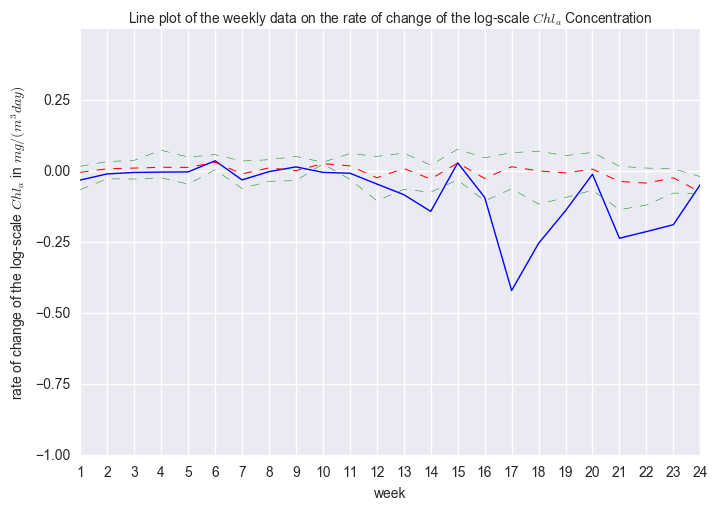

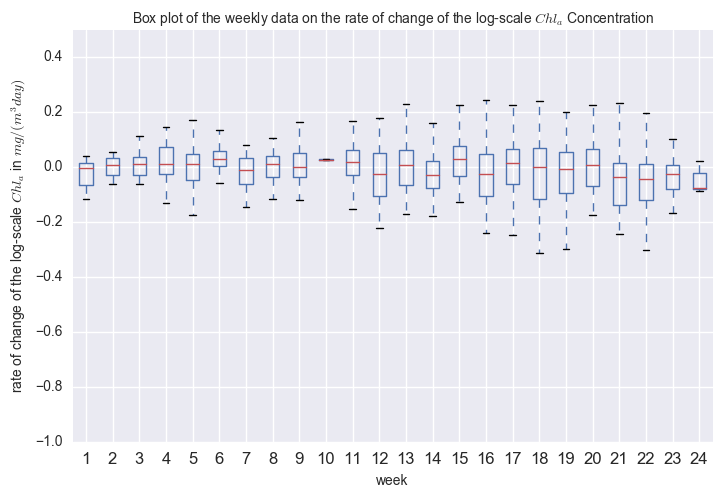

In [15]:
# weekly plot on the Lagrangian rate of change of the log-scale chl-a
# This is the rate of change on the exponential scale
axes1=df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-1,0.5)
axes1.set_title("Line plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-1, 0.5, 0.25))
plt.xticks(np.arange(1, 25, 1))
#plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chlor_a_logE_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1,0.5)
axes2.set_title("Box plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
#plt.show()


#plt.close('all')

In [16]:
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



 summary of the Chl_rate 
 count    102.000000
mean       0.020365
std        0.163387
min       -0.335095
25%       -0.023952
50%        0.010107
75%        0.036200
max        1.117373
Name: chl_rate, dtype: float64


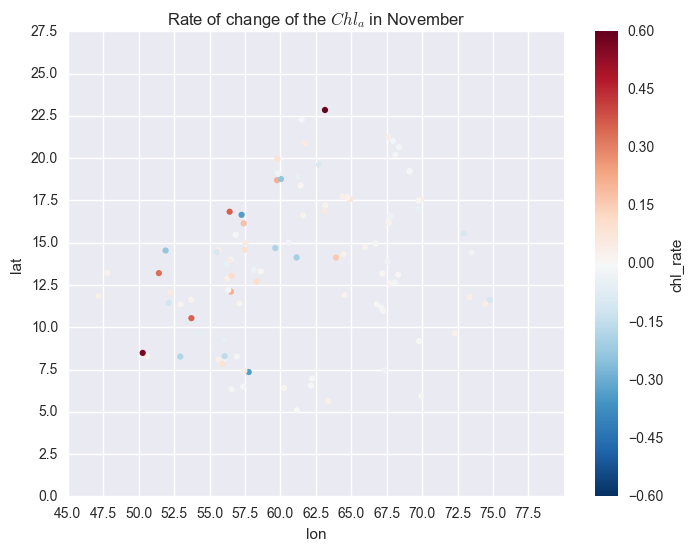



 summary of the Chl_rate 
 count    121.000000
mean       0.034917
std        0.189265
min       -0.316076
25%       -0.041403
50%        0.004956
75%        0.068338
max        1.424472
Name: chl_rate, dtype: float64


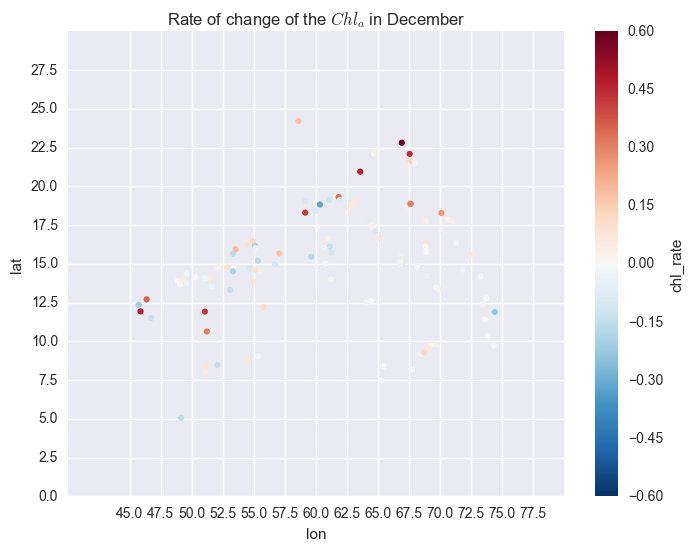



 summary of the Chl_rate 
 count    171.000000
mean       0.194033
std        3.028976
min      -13.251391
25%       -0.108855
50%        0.002778
75%        0.099613
max       29.425299
Name: chl_rate, dtype: float64


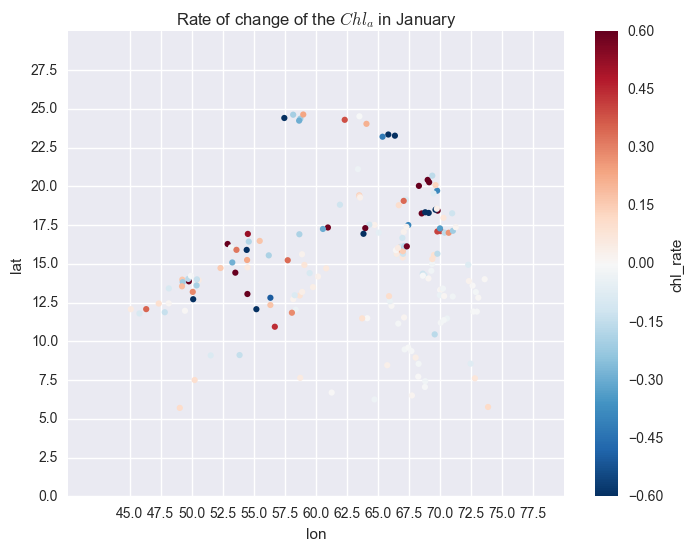



 summary of the Chl_rate 
 count    190.000000
mean      -0.586618
std        7.516451
min      -59.546418
25%       -0.099804
50%        0.003100
75%        0.158382
max       34.378983
Name: chl_rate, dtype: float64


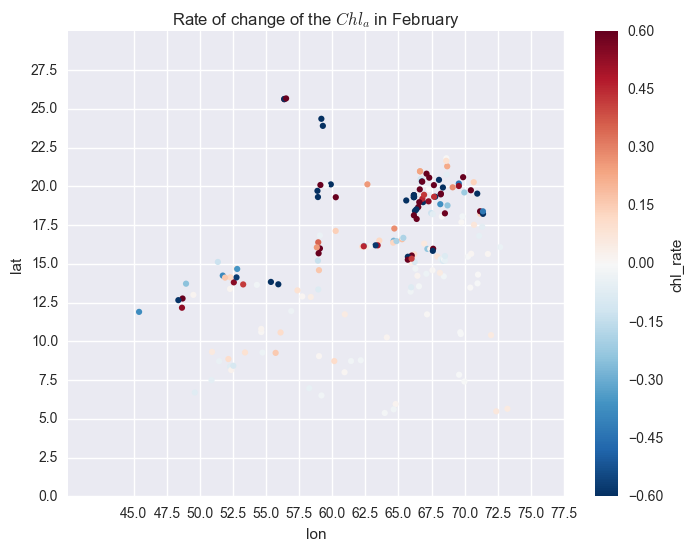



 summary of the Chl_rate 
 count    190.000000
mean      -0.118652
std        5.788752
min      -37.328540
25%       -0.124904
50%       -0.015206
75%        0.015472
max       40.412247
Name: chl_rate, dtype: float64


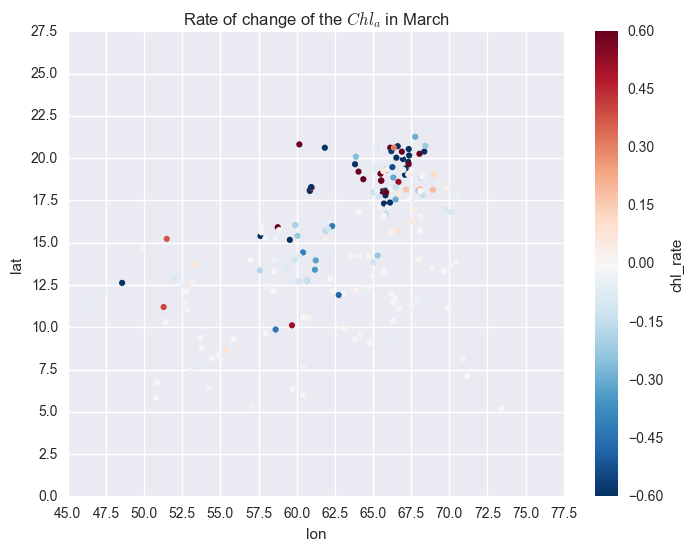

In [17]:
# spatial plot for different months --  totally five months 1, 2, 3, 11, 12, 
for i in range(0,5,1):
    month_ind = np.array([11,12,1,2,3])
    month_names = ['November', 'December','January','February', 'March']
    aa = df_timed_NovMar[df_timed_NovMar.index.month == month_ind[i]]
    fig, ax  = plt.subplots(figsize=(8,6))
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.median()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.median()-0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.mean()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.mean()+0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    print('\n\n summary of the Chl_rate \n', aa.chl_rate.describe())
    aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=-0.6, vmax=0.6, edgecolor='none', ax=ax, title = 'Rate of change of the $Chl_a$ in %s' % (month_names[i]))
    plt.xticks(np.arange(45, 80, 2.5))
    plt.yticks(np.arange(0, 28, 2.5))
    plt.show()

In [18]:
print("test")

test
